# su2nn

SU(2) and time-reversal equivariant neural network for quantum spin system

## 1. Introduction

The first obvious quantum spin effect we can observe is in the field of magnetism. Magnetism is important because it is crucial in various technological applications, such as data storage, electric motors, and generators. In addition, magnetic materials have been widely studied in condensed matter physics, where understanding their magnetic properties can provide insights into fundamental phenomena such as quantum phase transitions and spin dynamics. Moreover, the most recent theoretical developments of quantum spin have led to many applications in advanced fields like topological material, lossless electronics, and quantum information.

Quantum spin is the quantum angular momentum internal degree of freedom. Together with the external counterpart, the quantum angular momentum has SU(2) as its symmetry group, i.e. it can be described by a representation of the group of 2 by 2 unitary matrices with unit determinant. It also turns out that SU(2) is a Lie group with exactly the same Lie algebra as SO(3), up to the generators equivalence. This means that SU(2) is homomorphic to SO(3), but SU(2) is more fundamental in describing quantum systems. Furthermore, spin systems can also break the time-reversal symmetry which is a discrete symmetry similar to parity but for temporal instead of spatial. With this nature of quantum spin system’s symmetry, it is straight forward to attempt the generalization of e3nn package that is already SO(3) and parity equivariant to also SU(2) and time-reversal equivariant in order to make a machine learning model that is suitable to the symmetry of the spin system.

In this project, we modified the source code of e3nn, specifically the irreducible representation classes, to handle the SU(2) symmetry group, i.e. expanding integer angular number requirement to include half-integer, and increase the discrete symmetry channel of time-reversal on top of parity. We then propagated the change of this class through out the whole e3nn package. After that, we tested the sanity of the modified package with various equivariant properties we learned in class, and performed experiments with some simple quantum spin systems.

## 2. Related Works

Machine learning has been increasingly applied to predicting material properties, including spin, due to its potential to enhance accuracy and efficiency compared to traditional methods. There are works taking the symmetry described in SU(2) to represent the property of spin in a reasonable way. 

Machine learning helps us understand the relationship between spin configuration and other material properties. Models are proposed for predicting the properties of quantum materials, like the topological features of their electronic structures, using spin configuration as input. Also, there are models predicting spin states. A  neural network model to predict whether the spin is up or down, providing the electronic configurations of transition-metal compounds. This is important for understanding their magnetic and electronic properties. The model utilizes local crystal structure as input to predict electronic configurations accurately. Another work proposes a machine learning method using an artificial neural network to represent a complex spin Hamiltonian, which can be used to study spin systems. The method utilizes a feedforward neural network with a modified activation function to represent the Hamiltonian and shows promising results in predicting the behavior of spin systems.

A graph neural network (GNN) is the most common approach to studying the structure-property relationship of materials, as it can take the geometrical aspect of materials into the models. A graph neural network model can predict material properties incorporating local and global information about the material structure. The model utilizes residual correlation to enhance the accuracy of prediction performance through the work using spin states of the Ising model. Another model utilizes the local environment of each atom in the material to predict its magnetic moment and shows improved accuracy compared to traditional methods.

We can use machine learning to detect and evaluate the specific symmetry of the dataset. One work presents a neural network method for detecting symmetries like the one in SU(2), which can be applied to identify symmetry-protected topological phases. The method utilizes convolutional neural networks to learn the features of the data and then applies group theoretic techniques to extract the symmetries. Another model work presents a machine learning approach to learning order parameters of SU(2) lattice gauge theory, which describes the behavior of spin systems. The method utilizes a neural network to learn the mapping from spin configurations to the corresponding order parameters and shows promising results in predicting the behavior of spin systems.

## 3. Background
### 3.1 SU(2) Irreducible Representation
Similar to the process for SO(3) in lectures, one can start from the definition of SU(2) as a group of 2 by 2 unitary matrices with unit determinant. This entails that each member of the group can be written in the form
$$
    U = e^{-iA} \tag{1}
$$
with 
$$
    A^\dag = A, \text{Tr}A = 0. \tag{2}
$$
From this criteria, we can deduce one possible selection of the generators as
$$
\begin{align}
    A &= \begin{bmatrix}c & a - ib \\ a + ib & - c\end{bmatrix} \nonumber\\
    &= a\cdot\sigma_x + b\cdot\sigma_y + c\cdot\sigma_z \nonumber\\
    &= (a, b, c)\cdot\vec{\sigma} \nonumber\\
    &\equiv \dfrac{1}{2}\vec{\sigma}\cdot\hat{n}\phi
\end{align} \tag{3}
$$
where $\sigma$'s are Pauli matrices, $\hat{n}$ is the unit vector in $(a, b, c)$ direction, and $\phi$ is twice the magnitude of $(a, b, c)$. These choices of parameters are for the consistency with the quantum spin community.

Since $\sigma_z$ is the only diagonal generator, it is trivial that the generators are of irreducible representation. Furthermore, the commutation relation of the Pauli matrix is
$$
    [\sigma_p/2, \sigma_q/2] = i\epsilon_{pqr}\sigma_r/2, \tag{4}
$$
which is exactly the same as SO(3)'s Lie algebra. This means that we can directly define
$$
\begin{align}
    J^{(1/2)}_{p\in\{x, y, z\}} &\equiv \sigma_p/2 \\
    (J^{(1/2)})^2 &\equiv (J^{(1/2)}_x)^2 + (J^{(1/2)}_y)^2 + (J^{(1/2)}_z)^2
\end{align} \tag{5}
$$
where $(J^{(1/2)})^2$ commute with $J^{(1/2)}_{p\in\{x, y, z\}}$. Hence, we can choose to label states with eigenvalues of $(J^{(1/2)})^2$ and $J^{(1/2)}_z$ which are $j(j+1)$ and $m$ where $j = 1/2$ and $m \in \{1/2, -1/2\}$. From here, one can use tensor product together with representation reduction to generate all orders of representations with $j\in\{0, 1/2, 1, 3/2, ...\}$.

Because of these equivalence in algebra between SO(3) and SU(2), we can use ladder operator trick to get the ladder operators' matrix representations which, in turn, gives the matrix representations of $J^{(j)}_{p\in\{x, y\}}$. ($J^{(j)}_z$ is trivial with our of choice of state and the fact that $m\in\{-j, -j+1, ..., j-1, j\}$.) In fact, the e3nn package actually uses this SU(2) generator method and restrict the value of $l$ (instead of $j$) to be integer.

### 3.2 Time-Reversal Symmetry

The concept of time-reversal (TRS) is very similar to inversion. It is essentially the inversion of temporal axis instead of the spatial axes normal inversion. However, since the system we are interested is a quantum system, the action of the TR must preserve the Schrodinger equation. This essentially require the action to complex conjugate both representation, and basis. Furthermore, since the concept is very similar to inversion , and TR commutes with SO(3), inversion (P), and SU(2), it is straight forward to directly tensor product the TRS irreducible representation by the means of channel selection similar to P.

## 4. Method

Since most of the backbone functions in e3nn is publicly available, we decided to use e3nn as the core, and modify all required function in the package to accomodate the functional of SU(2) and TRS equivariance. The following are the list of what we did inorder to achieve this.
1. Modify Irrep, _mulir, and Irreps classes such that our working representation is indexed by 3 parameters: $j$ for angular momentum number, $p$ for parity, and $t$ for TRS. In other words, the Irreps changes from $lp$ to $jpt$. Such that $j$ can be both half-integer and integer, and $t$ can be odd or even (like P).
2. Since ultimately our prediction will be spin states, it is easier to evaluate if we use complex spin spherical harmonic, we modify the functions for generators, Clensch-Gordan, Wigner-3j, and Wigner_D matrices accordingly. (e3nn use real spherical harmonic)
3. Read through every function in e3nn package, and change every thing to match the modified functions in step 1, and 2.
4. Test Irreps classes similar in many aspect similar to the online documentation of e3nn.
5. Test equivariance properties of tensor product, and gate activation (building blocks for convolutional graph neural network)

## 5. Results
### 5.1 Irreducible representations

In this section, we show case the modified irreducible representation classes from e3nn.

In [1]:
from su2nn_e3nn_core.su2 import Irrep, Irreps

#### 5.1.1 Single Irrep
Create a scalar representation ( $j = 0$) of odd P, and even TRS.

In [2]:
Irrep('0oe')

0oe

Create the same irrep but with tuple arguments.

In [3]:
Irrep(0, -1, 1)

0oe

Create a $j = 7/2$ representation of even P, and odd TRS.

In [4]:
Irrep('3.5eo')

7/2eo

#### 5.1.2 Irreps

Create composite object's Irreps that contain information of hydrogen's mass (scalar, even TRS), displacement (vector, even TRS), and electron spin state ( $j=1/2$, even P, odd TRS).

In [5]:
irreps_H = Irreps('1x0ee+1x1oe+1x0.5eo')

Total dimension of this object (1 for scalar, 3 for vector, and 2 for spin).

In [6]:
irreps_H.dim

6

Number of Irreps (1 for each of Irrep).

In [7]:
irreps_H.num_irreps

3

List all j's in the Irreps.

In [8]:
irreps_H.ls

[Fraction(0, 1), Fraction(1, 1), Fraction(1, 2)]

#### 5.1.3 SU(2), and P actions' matrix representations
Short handing torch.tensor with t.

In [9]:
import torch
t = torch.tensor

Create a testing Irreps.

In [10]:
irreps = Irreps('1x0ee+1x1/2oe+1x1oo+1x3/2eo')

Generate P's representation of the created Irreps. The matrix is diagonal with 1 for all non-zeros elements that correspond to even parity, and -1 for odd.

In [11]:
irreps.D_from_angles(alpha = t(0.), beta = t(0.), gamma = t(0.), ps = t(1))

tensor([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, -0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]],

Look at generators of SU(2) for $j\leq 3/2$

In [12]:
from su2nn_e3nn_core.su2 import su2_generators
su2_generators(0)

(tensor([[0.+0.j]], dtype=torch.complex128),
 tensor([[0.+0.j]], dtype=torch.complex128),
 tensor([[0.+0.j]], dtype=torch.complex128))

In [13]:
su2_generators(1/2)

(tensor([[0.+0.0000j, 0.+0.5000j],
         [0.+0.5000j, 0.+0.0000j]], dtype=torch.complex128),
 tensor([[ 0.0000+0.j,  0.5000+0.j],
         [-0.5000+0.j,  0.0000+0.j]], dtype=torch.complex128),
 tensor([[-0.-0.5000j, 0.+0.0000j],
         [0.+0.0000j, 0.+0.5000j]], dtype=torch.complex128))

In [14]:
su2_generators(1)

(tensor([[0.+0.0000j, 0.+0.7071j, 0.+0.0000j],
         [0.+0.7071j, 0.+0.0000j, 0.+0.7071j],
         [0.+0.0000j, 0.+0.7071j, 0.+0.0000j]], dtype=torch.complex128),
 tensor([[ 0.0000+0.j,  0.7071+0.j,  0.0000+0.j],
         [-0.7071+0.j,  0.0000+0.j,  0.7071+0.j],
         [ 0.0000+0.j, -0.7071+0.j,  0.0000+0.j]], dtype=torch.complex128),
 tensor([[-0.-1.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+1.j]], dtype=torch.complex128))

In [15]:
su2_generators(3/2)

(tensor([[0.+0.0000j, 0.+0.8660j, 0.+0.0000j, 0.+0.0000j],
         [0.+0.8660j, 0.+0.0000j, 0.+1.0000j, 0.+0.0000j],
         [0.+0.0000j, 0.+1.0000j, 0.+0.0000j, 0.+0.8660j],
         [0.+0.0000j, 0.+0.0000j, 0.+0.8660j, 0.+0.0000j]],
        dtype=torch.complex128),
 tensor([[ 0.0000+0.j,  0.8660+0.j,  0.0000+0.j,  0.0000+0.j],
         [-0.8660+0.j,  0.0000+0.j,  1.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -1.0000+0.j,  0.0000+0.j,  0.8660+0.j],
         [ 0.0000+0.j,  0.0000+0.j, -0.8660+0.j,  0.0000+0.j]],
        dtype=torch.complex128),
 tensor([[-0.-1.5000j, 0.+0.0000j, 0.+0.0000j, 0.+0.0000j],
         [0.+0.0000j, -0.-0.5000j, 0.+0.0000j, 0.+0.0000j],
         [0.+0.0000j, 0.+0.0000j, 0.+0.5000j, 0.+0.0000j],
         [0.+0.0000j, 0.+0.0000j, 0.+0.0000j, 0.+1.5000j]],
        dtype=torch.complex128))

Randomly generate SU(2)'s representation (Wigner D-matrix) of the created Irreps. The plot directly show reducibility of Irreps into each Irrep, as created ( $j = 0, 1/2, 1, 3/2$), which correspond to the block diagonal matrix representation (with dimensions $2j+1 = 1, 2, 3, 4$).

[]

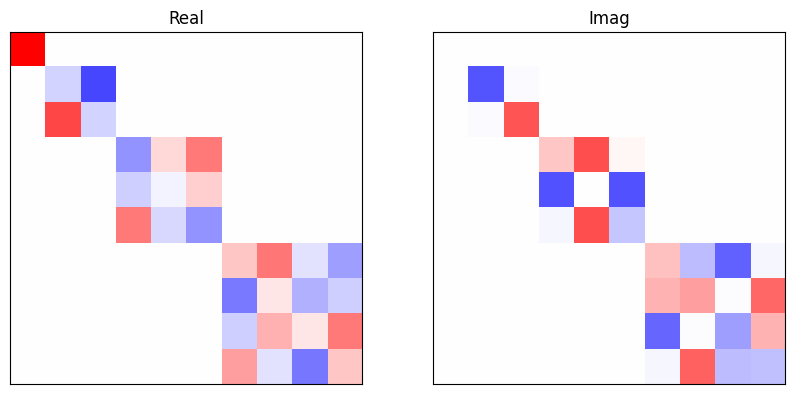

In [16]:
from su2nn_e3nn_core import su2
import matplotlib.pyplot as plt

rot = su2.rand_matrix()
D = irreps.D_from_matrix(rot)

fig, axs = plt.subplots(1,2, figsize = (10, 5))

axs[0].imshow(D.real, cmap='bwr', vmin = -1, vmax = 1)
axs[0].set_title('Real')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(D.imag, cmap='bwr', vmin = -1, vmax = 1)
axs[1].set_title('Imag')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.plot()

One distinct feature of SU(2) group representation is the introduction of -1 phase (represented in blue) after any $2\pi$ rotation for half-integer $j$. In this case, our created Irreps has $j=1/2$, and $j=3/2$ as half-integer $j$'s.

[]

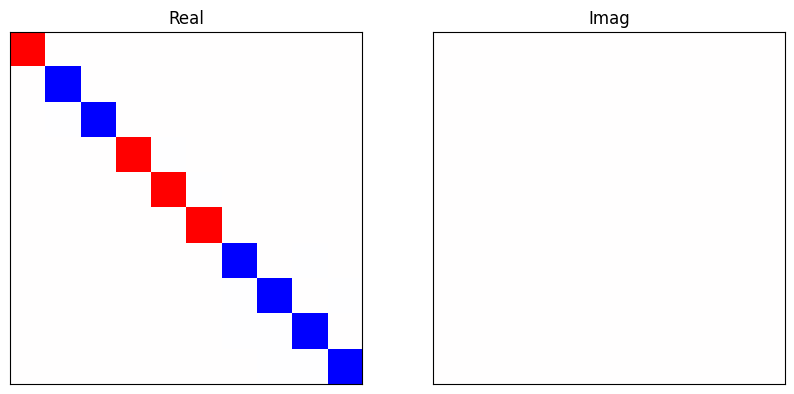

In [17]:
D = irreps.D_from_angles(t(0.), t(2*torch.pi), t(0.))

fig, axs = plt.subplots(1,2, figsize = (10, 5))

axs[0].imshow(D.real, cmap='bwr', vmin = -1, vmax = 1)
axs[0].set_title('Real')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(D.imag, cmap='bwr', vmin = -1, vmax = 1)
axs[1].set_title('Imag')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.plot()

As obvious from the matrix representation, the $2\pi$ rotation flips sign of half-integer Irreps.

[]

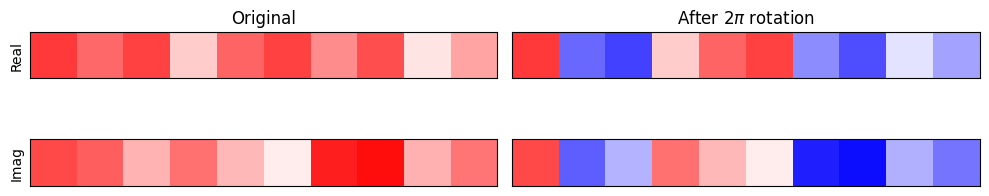

In [18]:
x = torch.reshape(torch.rand(irreps.dim, dtype = torch.complex128), (-1, 1))

fig, axs = plt.subplots(2, 2, figsize = (10, 3))

axs[0, 0].imshow(x.real.T, cmap='bwr', vmin=-1, vmax=1)
axs[0, 0].set_title('Original')
axs[0, 0].set_ylabel('Real')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[1, 0].imshow(x.imag.T, cmap='bwr', vmin=-1, vmax=1)
axs[1, 0].set_ylabel('Imag')

axs[0, 1].set_title(r'After $2\pi$ rotation')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[0, 1].imshow((D@x).real.T, cmap='bwr', vmin=-1, vmax=1)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 1].imshow((D@x).imag.T, cmap='bwr', vmin=-1, vmax=1)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.tight_layout()
plt.plot()

### 5.2 Tensor Product

Here, we show case the consistency of tensor product of su2nn with respect to e3nn. With the same logic of angular momentum addition as SO(3), SU(2) tensor product between $j_1$ and $j_2$ give (after reduced) $j = |j_2-j_1|, |j_2-j_1| + 1, ..., j_2+j_1-1, j_2+j_1$. Furthermore, the logic of TR path is the same as P such that odd-odd, and even-even TRS tensor products give even TRS Irreps where the other two give odd TRS Irreps.

#### 5.2.1 Integer-Integer Tensor Product

d:\python_virtualenv\su2nn\lib\site-packages\torch\jit\_check.py:172: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "


FullTensorProduct(1x0ee+1x1ee x 1x0ee+1x1ee -> 2x0ee+3x1ee+1x2ee | 6 paths | 0 weights)

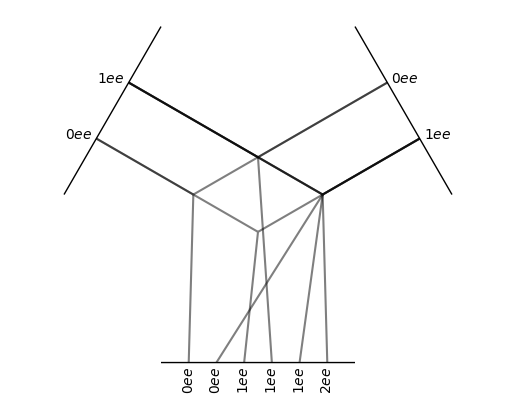

In [19]:
tp = su2.FullTensorProduct('1x0ee+1x1ee', '1x0ee+1x1ee')
tp.visualize()
tp

#### 5.2.2 Integer-Half-integer Tensor Product

FullTensorProduct(1x0ee+1x1ee x 1x1/2ee+1x3/2ee -> 3x1/2ee+3x3/2ee+1x5/2ee | 7 paths | 0 weights)

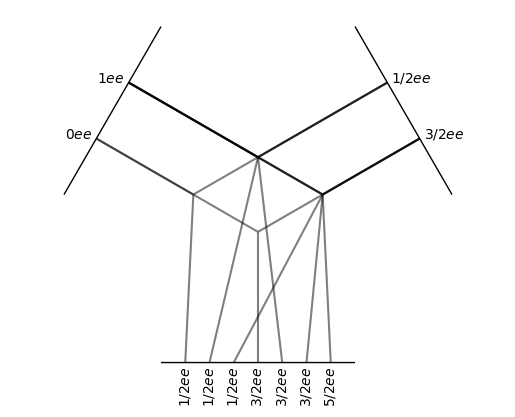

In [20]:
tp = su2.FullTensorProduct('1x0ee+1x1ee', '1x1/2ee+1x3/2ee')
tp.visualize()
tp

#### 5.2.3 Half-integer-Half-integer Tensor Product

FullTensorProduct(1x1/2ee+1x3/2ee x 1x1/2ee+1x3/2ee -> 2x0ee+4x1ee+3x2ee+1x3ee | 10 paths | 0 weights)

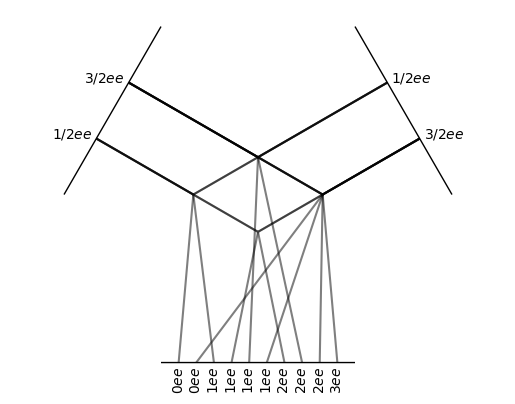

In [21]:
tp = su2.FullTensorProduct('1x1/2ee+1x3/2ee', '1x1/2ee+1x3/2ee')
tp.visualize()
tp

#### 5.2.4 Parity Channeling

FullTensorProduct(1x0ee+1x0oe x 1x0ee+1x0oe -> 2x0oe+2x0ee | 4 paths | 0 weights)

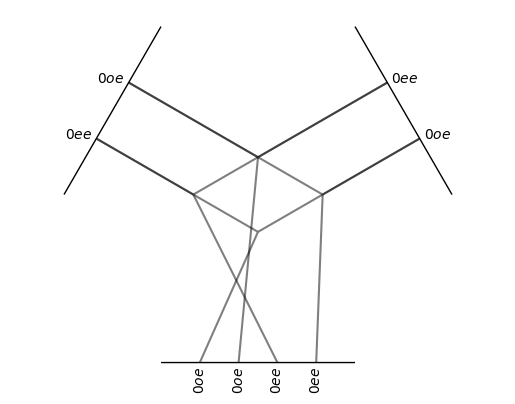

In [22]:
tp = su2.FullTensorProduct('1x0ee+1x0oe', '1x0ee+1x0oe')
tp.visualize()
tp

#### 5.2.5 Time-reversal Channeling

FullTensorProduct(1x0ee+1x0eo x 1x0ee+1x0eo -> 2x0eo+2x0ee | 4 paths | 0 weights)

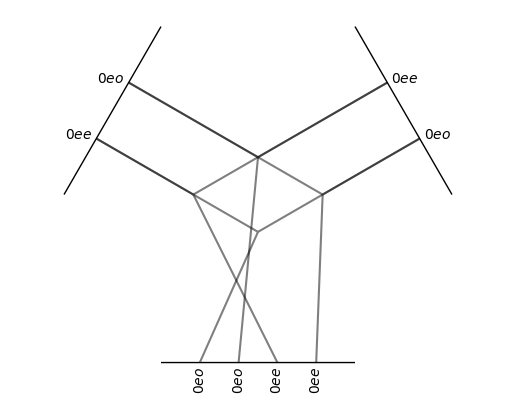

In [23]:
tp = su2.FullTensorProduct('1x0ee+1x0eo', '1x0ee+1x0eo')
tp.visualize()
tp

### 5.3 Equivariant Check

The final mile stone of this project is to check the equivariance of the package, i.e. whether the modification actually works for trainging as claimed. Since the TRS equivariant features are not fully settled, we will only set all Irreps to be even TRS. As the preliminary check, we need to check the equivariance of the building block which are tensor products (crucial for convolutions), and gate activation (crucial for nonlinearity of the model).

#### 5.3.1 Equivariant Tensor Product

Introduce an arbitrary tensor product.

In [24]:
jmax = 1
irreps_input = Irreps("1x1oe + 1x3/2ee")
irreps_edge_attr = Irreps("1x1oe + 1x3/2ee")
irreps_output = Irreps("1x0ee+1x1/2oe+1x1ee+1x3/2oe")

FullyConnectedTensorProduct(1x1oe+1x3/2ee x 1x1oe+1x3/2ee -> 1x0ee+1x1/2oe+1x1ee+1x3/2oe | 8 paths | 8 weights)

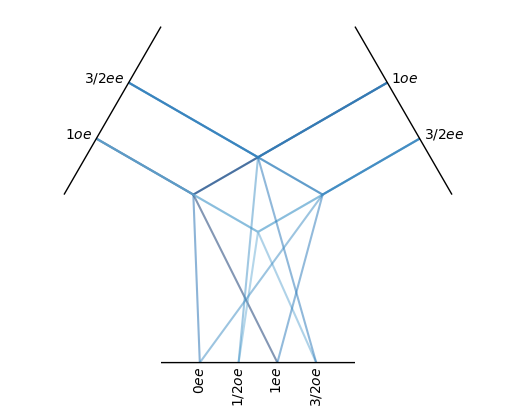

In [25]:
tp = su2.FullyConnectedTensorProduct(irreps_input, irreps_edge_attr, irreps_output)
tp.visualize()
tp

Randomly ganerate inputs, and weights. Then calculate unrotated output.

In [26]:
input = torch.randn(irreps_input.dim).to(dtype = torch.complex128)
edge_attr = torch.randn(irreps_edge_attr.dim).to(dtype = torch.complex128)
weight = torch.randn(tp.weight_numel)

output = tp(input, edge_attr, weight)

Generate random rotations, and check equivariance.

In [27]:
import numpy as np
for _ in range(10):
    alpha = torch.randn(1)
    beta = torch.randn(1)
    gamma = torch.randn(1)

    D_input = irreps_input.D_from_angles(alpha, beta, gamma)
    D_edge_attr = irreps_edge_attr.D_from_angles(alpha, beta, gamma)
    D_output = irreps_output.D_from_angles(alpha, beta, gamma)
    input_rotated = torch.einsum('kij,j->i', D_input, input)
    edge_attr_rotated = torch.einsum('kij,j->i', D_edge_attr, edge_attr)
    output_rotated = torch.einsum('kij,j->i', D_output, output)

    print(np.round(torch.abs(output_rotated- tp(input_rotated, edge_attr_rotated, weight)), 4))

tensor([0.3339, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.1623, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.4255, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.2752, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.1835, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.1554, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.2371, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.3860, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], dtype=torch.float64)
tensor([0.1004, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

From this test, it is clear that the tensor product is not equivariant for interger $j$ output. We just found this problem since we want to focus on spin predictions, i.e. $j=1/2$ output. We have yet found the reason for this problem, but it is most likely from the function that handle Clensch-Gordan coefficients, Wigner-3j, and Wigner_D matrices since it is the only place that different $j$ can have different functional effects.

#### 5.3.2 Equivariant Gate Activation

Generate arbitrary gate activation.

In [28]:
from su2nn_e3nn_core.nn import Gate

act = {  1: torch.tanh,
        -1: torch.tanh}

irreps_scalars = Irreps('3x0ee')
irreps_gated = Irreps('1x1/2ee+1x1oe')
irreps_gates = Irreps([(mul, '0ee') for mul, _ in irreps_gated])
gate = Gate(irreps_scalars, [act[ir.p] for _, ir in irreps_scalars],
            irreps_gates, [act[ir.p] for _, ir in irreps_gates],
            irreps_gated)

Randomly generate inputs. Then, calculate unrotated output.

In [29]:
input = torch.randn(gate.irreps_in.dim).to(dtype = torch.complex128)
output = gate(input)

Generate random rotations, and check equivariance.

In [30]:
for _ in range(10):
    alpha = torch.randn(1)
    beta = torch.randn(1)
    gamma = torch.randn(1)

    D_input = gate.irreps_in.D_from_angles(alpha, beta, gamma)
    D_output = gate.irreps_out.D_from_angles(alpha, beta, gamma)
    input_rotated = torch.einsum('kij,j->i', D_input, input)
    output_rotated = torch.einsum('kij,j->i', D_output, output)

    print(torch.allclose(output_rotated, gate(input_rotated)))

True
True
True
True
True
True
True
True
True
True


From this test, the gate activation feature is equivariant.

#### 5.3.3 Equivariant Model

Arbitrarily create a graph neural network model with similar architechture to models in https://github.com/e3nn/e3nn/blob/main/e3nn/nn/models. Since the tensor product is not fully equivariant, it is clear that the model cannot be equivariant. However, it turn out (from our experiment) that $2\pi$ rotation is always tensor product equivariant. Hence, it is an indicator (but not sufficient proof) that if our models built from current tensor product function is $2\pi$ equivariant, it should be an equivariant model after tensor product is fixed.

![Alt text](sample_model.png)

In [31]:
from project.model import GraphNetwork
from torch_cluster import radius_graph

def get_node_deg(edge_dst, n):
    node_deg = np.zeros((n, 1))
    for dst in edge_dst:
        node_deg[dst] += 1
    node_deg += node_deg == 0
    return torch.from_numpy(node_deg)

jmax = 2
mul = 2
nlayers = 2
number_of_basis = 10
radial_layers = 10
radial_neurons = 10

irreps_input = Irreps('1x1oe+1x3/2ee')
irreps_output = Irreps('1x0ee+1x1/2ee')
irreps_edge_attr = Irreps([(1, x) for x in Irrep.iterator(jmax)])

num_nodes = 2
pos = torch.randn(num_nodes, 3)
max_radius = torch.tensor(4)
edge_src, edge_dst = radius_graph(pos, max_radius, max_num_neighbors = num_nodes - 1)

edge_vec = pos[edge_dst] - pos[edge_src]
edge_len = torch.linalg.norm(edge_vec, dim = -1)

deg = get_node_deg(edge_dst, num_nodes)

model = GraphNetwork(mul, irreps_input, irreps_output, jmax, nlayers, number_of_basis, radial_layers, radial_neurons)

Randomly generate inputs. Then, calculate unrotated output.

In [32]:
x = torch.randn(num_nodes, irreps_input.dim)
z = torch.randn(num_nodes, 1)
out = model(x, z, edge_src, edge_dst, edge_vec, edge_len, max_radius, deg)

Check equivariance for $2\pi$ rotation.

In [33]:
alpha = t(0)
beta = t(2*torch.pi)
gamma = t(0)

D_inp = irreps_input.D_from_angles(alpha, beta, gamma)
D_vec = Irreps('1x1oe').D_from_angles(alpha, beta, gamma)
D_out = irreps_output.D_from_angles(alpha, beta, gamma)


Dx = torch.einsum('ij,kj->ki', D_inp, x.to(dtype = torch.complex128))
Dedge_vec = torch.einsum('ij,kj->ki', D_vec, edge_vec.to(dtype = torch.complex128))
Dout = torch.einsum('ij,kj->ki', D_out, out.to(dtype = torch.complex128))

outDx = model(Dx, z.to(dtype = Dx.dtype), edge_src, edge_dst, Dedge_vec.to(dtype = Dx.dtype), edge_len.to(dtype = Dx.dtype), max_radius.to(dtype = Dx.dtype), deg.to(dtype = Dx.dtype))
print(torch.allclose(outDx, Dout))
print(out)
print(Dout)
print(outDx)

True
tensor([[ 1.1726,  1.0227, -0.4243]], grad_fn=<ScatterAddBackward0>)
tensor([[ 1.1726+0.j, -1.0227+0.j,  0.4243+0.j]], grad_fn=<ViewBackward0>)
tensor([[ 1.1726+0.j, -1.0227+0.j,  0.4243+0.j]],
       grad_fn=<ScatterAddBackward0>)


## 6. Conclusion

To fully capture the symmetry of quantum spin system, the extension of e3nn to include SU(2) and TRS is needed. From the properties of SU(2) we can achieve this inclusion by modifying the e3nn code to include half-integer 𝑗. Like wise, from the similarity of TRS to P, we can add another channel selecting index $t$. However, TRS need conjugation handling which is pretty tricky with the complex spherical harmonic basis used. Hence, our implementation of Irreps contain TRS consideration, but the package is not yet usable for TRS learning. At current state, the package can generate SU(2) and P equivariant model (except some path in tensor product where layers' outputs contain integer $j$ Irreps). Finally, we aim (after this class) to fixed there remaining bugs, implement the TRS feature, and apply the model to do simple magnetic material classification, e.g. against e3nn, to test the SU(2) significance in quantum spin model.

## 7. Reference



1. Spaldin, N. A. Magnetic materials: fundamentals and applications (Cambridge university press, 2010).
2. Sachdev, S. Quantum phase transitions. Physics world 12, 33 (1999).
3. Vergniory, M. et al. A complete catalogue of high-quality topological materials. Nature 566, 480–485 (2019).
4. Mannhart, J. & Braak, D. Lossless currents at high temperatures. Journal of Superconductivity and Novel Magnetism 32, 17–21 (2019).
5. Bennett, C. H. & DiVincenzo, D. P. Quantum information and computation. nature 404, 247–255 (2000).
6. Beeler, M. C. et al. The spin Hall effect in a quantum gas. Nature 498, 201–204 (June 2013).
7. Chen, G., Essin, A. & Hermele, M. Majorana spin liquids and projective realization of SU(2) spin symmetry. Phys. Rev. B 85, 094418 (9 Mar. 2012).
8. Dilley, D., Gonzales, A. & Byrd, M. Identifying quantum correlations using explicit SO(3) to SU(2) maps. Quantum Information Processing 21, 343 (Oct. 2022).
9. Heyde, K. & Wood, J. L. Quantum Mechanics for Nuclear Structure, Volume 2 isbn: 978-0-7503-2171-6 (IOP Publishing, 2020).
10. Kosmann-Schwarzbach, Y. Groups and Symmetries. From Finite Groups to Lie Groups (Springer, 2022).
11. Vedmedenko, E. Y. & Wiesendanger, R. Spin revolution breaks time reversal symmetry of rolling magnets. Scientific Reports 12, 13608 (Aug. 2022).
12. Yi, Y.-S., Qian, T.-Z. & Su, Z.-B. Spin precession and time-reversal symmetry breaking in quantum transport of electronsthrough mesoscopic rings. Phys. Rev. B 55, 10631–10637 (16 Apr. 1997).
13. Geiger, M. et al. Euclidean neural networks: e3nn version 0.5.0. Apr. 2022.
14. Geiger, M. & Smidt, T. e3nn: Euclidean Neural Networks 2022.
15. Carrasquilla, J. Machine learning for quantum matter. Advances in Physics: X 5, 1797528 (2020).
16. Zhang, W., Berthebaud, D., Halet, J.-F. & Mori, T. Electronic Configurations of 3d Transition-Metal Compounds Using Local Structure and Neural Networks. The Journal of Physical Chemistry A 126, 7373–7381 (2022).
17. Yu, H. et al. Complex spin Hamiltonian represented by an artificial neural network. Physical Review B 105, 174422 (2022).
18. Jia, J. & Benson, A. R. Residual correlation in graph neural network regression in Proceedings of the 26th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (2020), 588–598.
19. Yu, H., Zhong, Y., Xu, C., Gong, X. & Xiang, H. Graph Neural Network Potential for Magnetic Materials. arXiv (2022).
20. Krippendorf, S. & Syvaeri, M. Detecting symmetries with neural networks. Machine Learning: Science and Technology 2, 015010 (2020).
6
21. Wetzel, S. J. & Scherzer, M. Machine learning of explicit order parameters: From the Ising model to SU (2) lattice gauge theory. Physical Review B 96, 184410 (2017)